# \_\_call\_\_() magic method
- 객체를 함수처럼 호출 할 수 있도록 한다.
- `객체()` 로 호출 할 때 __call__ 메소드가 호출되어 실행된다.

In [12]:
class Person:
    def __init__(self, name):
        print("__init__()실행")
        self.name = name
        
    def __str__(self):
        print("__str__()실행")
        return f"이름은 {self.name} 입니다."
    
    def __call__(self):
        print(f"call 함수실행: {self.name} ")
        

In [13]:
class Nums:
    def __init__(self, num):
        self.num = num
        
    def __call__(self, append_num):
        self.num = self.num + append_num
        return self.num
        
    def __str__(self):
        return f'num: {self.num}'

In [14]:
n = Nums(10)
print(n) # print(값) str(값) 이용해서 문자열로 변환후 출력

num: 10


In [15]:
n(20) # __call__(append_num<=20)
print(n)

num: 30


In [16]:
v = Nums(100)(20) # 객체 생성 + __call__() 호출 동시
v

120

# Functional API
- Sequential 모델은 각 Layer들의 입력과 출력이 하나라고 가정한다. 그리고 각각의 Layer(입력층, 은닉층, 출력층)들을 차례대로 쌓아 구성한다. 그래서 다양한 구조의 네트워크를 만드는데 한계가 있다.
- 함수형 API를 사용하면 **다중입력, 다중출력, 그래프 형태**의 다양한 형태의 레이어들을 유연하게 구성할 수 있다.

- Functional API는 직접 텐서들의 입출력을 다룬다. 
- 함수호출 처럼 Layer를 이용하여 입력 텐서(Input Tensor)를 입력 받고 그 결과를 출력 텐서(Output Tensor)로 반환하는 형식으로 모델을 구현한다.

```python
input_tensor = Input(shape=(16,))
dense = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(32, activation='sigmoid')(dense)

model = models.Model(input_tensor, output_tensor)
```

## Sequential, Functional API 

### Sequential

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import layers, models

In [18]:
seq_model = keras.Sequential()
seq_model.add(layers.Input(shape=(32,32,3)))

seq_model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
seq_model.add(layers.MaxPooling2D(padding="same"))
seq_model.add(layers.Flatten())

seq_model.add(layers.Dense(units=256, activation='relu'))
seq_model.add(layers.Dense(units=10, activation='softmax', name='output_layer'))
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 256)               4194560   
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 4198922 (16.02 MB)
Trainable params: 4198922 (16.02 MB)
Non-trainable params: 0 (0.00 Byte)
________________

### Functional API

In [19]:
# 레이어의 흐름 구조를 구현
input_tensor = layers.Input(shape=(32, 32, 3))  # Inputlayer를 생성하면 안됨 -> input : 입력값을 표현, 입력값을 저장할 변수의 역할

conv_tensor = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input_tensor)
conv_tensor2 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv_tensor)
pool_tensor = layers.MaxPooling2D(padding='same')(conv_tensor)
flatten_tensor = layers.Flatten()(pool_tensor)
dense_tensor = layers.Dense(256, activation='relu')(flatten_tensor)
output_tensor = layers.Dense(10, activation='softmax')(dense_tensor)

# 모델 생성-> input들과 output들을 넣어서 생성. => 
##     input들/output들 : 학습/추론할때 실제 생성될 입력값, 출력값을 표현하는 tensor 객체.
##     여러개값으로 구성된 경우 일 경우 리스트로 묶어서 전달.
fn_model = models.Model(input_tensor, output_tensor)

In [20]:
fn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_1 (Dense)             (None, 256)               4194560   
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                             

##### 각 Layer의 출력 변수들 통일. 
- 일반적으로 block 단위로 동일한 변수명을 사용.
- hidden layer들의 출력결과는 모두 동일한 변수명을 사용

In [22]:
input_tensor = layers.Input(shape=(32,32,3))

x1 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(input_tensor)
x1 = layers.MaxPooling2D(padding='same')(x1)

x2 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x1)
x2 = layers.MaxPooling2D(padding='same')(x2)

x3 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x2)
x3 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x3)
x3 = layers.MaxPooling2D(padding='same')(x3)

x4 = layers.Flatten()(x3)
output_tensor = layers.Dense(10, activation='softmax')(x4)

model3 = models.Model(input_tensor, output_tensor)

model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2320

##### trainable 설정

In [23]:
input_tensor = layers.Input(shape=(32,32,3))

c1 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')
c1.trainable = False
x1 = c1(input_tensor)

x1 = layers.MaxPooling2D(padding='same')(x1)

x2 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x1)
x2 = layers.MaxPooling2D(padding='same')(x2)

x3 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x2)
x3 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x3)
x3 = layers.MaxPooling2D(padding='same')(x3)

x4 = layers.Flatten()(x3)
output_tensor = layers.Dense(10, activation='softmax')(x4)

model3 = models.Model(input_tensor, output_tensor)

model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 16)          2320

##### Transfer learning

In [24]:
# Pretrained 모델의 conv base(feature extractor)를 이용해 transfer learning
backbone = applications.VGG16(include_top=False)
backbone.trainable = False

input_tensor = layers.Input(shape=(224,224,3))
x = backbone(input_tensor)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(512, activation='relu')(x)
output_tensor = layers.Dense(1, activation='sigmoid')(x)
output_tensor2 = layers.Dense(10, activation='softmax')(x)

model4 = models.Model(input_tensor, [output_tensor, output_tensor2])
model4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_6[0][0]']             
                                                          8                                       
                                                                                                  
 global_average_pooling2d (  (None, 512)                  0         ['vgg16[0][0]']               
 GlobalAveragePooling2D)                                                                          
                                                                                            

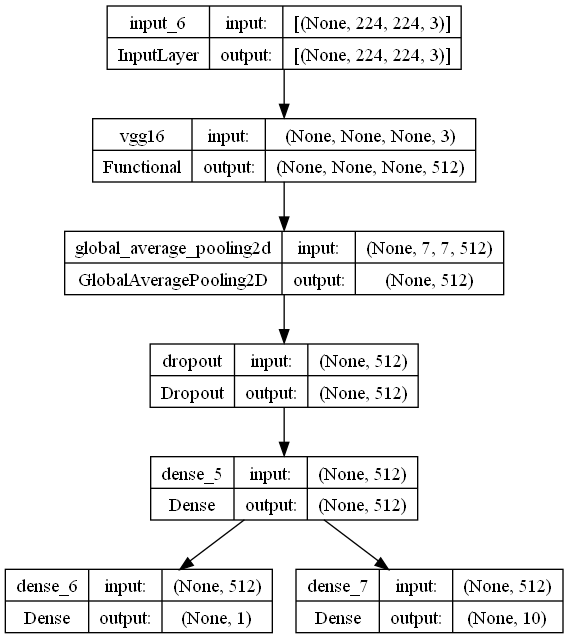

In [25]:
keras.utils.plot_model(model4, show_shapes=True)

## 여러개의 출력결과를  합치는 Layer

- 앞 레이어들에서 출력된 값이 여러개이고 이것을 하나의 Layer의 입력으로 넣어 줄 경우 **여러개의 출력값을 합쳐 줘야 한다.** 이때 단순이 합치거나 element wise 연산을 통해 합칠 수 있다. 
- 함수와 Layer class 두가지 방식을 제공한다.
    - tensorflow.keras.layers 모듈로 제공
- **concatenate(list, axis=-1)/Concatenate(axis=-1)([list])**
    - 레이어들을 단순히 합친다. (붙이는 처리)
    - list: 합칠 레이어들을 리스트에 묶어 전달
    - axis: 합칠 기준축. (기본값: -1 : 마지막 축기준)
- **add(list)/Add()(list), substract(list)/Subtract()(list), multiply(list)/Multiply()(list)**
    - 같은 index의 값들을 계산해서(더하기, 빼기, 곱하기) 하나의 레이어로 만든다.
    - list: 합칠 레이어들을 리스트에 묶어 전달

In [26]:
#ResNet의 Residual Block을 구현.
input_tensor = layers.Input(shape=(32,32,3))
x = layers.Conv2D(filters=64, kernel_size=7, padding='same', activation='relu')(input_tensor)
x = layers.MaxPooling2D(padding='same')(x)


x1 = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x)
x1 = layers.BatchNormalization()(x1)
x1 = layers.ReLU()(x1)
x1 = layers.Conv2D(filters=128, kernel_size=3, padding='same')(x1)
x1 = layers.BatchNormalization()(x1)

x1 = layers.Conv2D(filters=64, kernel_size=1, padding='same')(x1)  

x1 = layers.Add()([x, x1])   # x1 = layers.add([x, x1])

output_tensor = layers.ReLU()(x1)

rb_model = models.Model(input_tensor, output_tensor)

In [27]:
rb_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 32, 32, 64)           9472      ['input_7[0][0]']             
                                                                                                  
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 64)           0         ['conv2d_11[0][0]']           
 g2D)                                                                                             
                                                                                                  
 conv2d_12 (Conv2D)          (None, 16, 16, 64)           36928     ['max_pooling2d_8[0][0]'

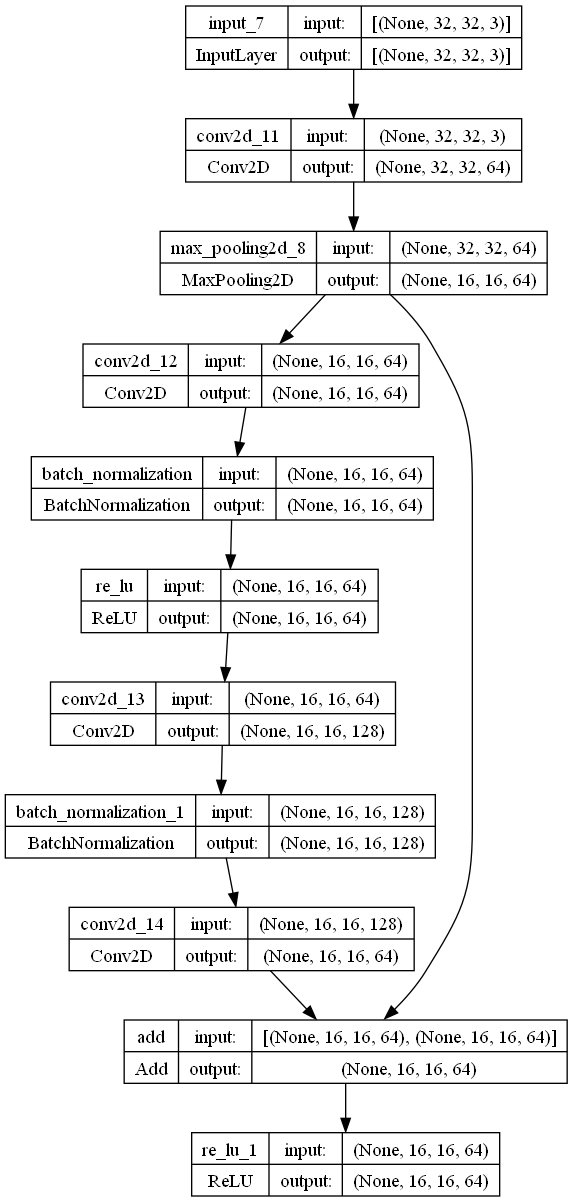

In [28]:
keras.utils.plot_model(rb_model, show_shapes=True)

### 다중 출력 모델
- 가정
    - iris 데이터셋에서 꽃받침의 너비와 높이로 꽃잎의 너비, 높이, 꽃 종류를 예측하는 모델
    - 출력결과가 3개가 나와야 한다.
- X: 꽃받침 너비, 높이
- y: 꽃잎 너비, 높이, 꽃 종류

In [29]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [30]:
# X, y의 형태를 변환 
# y1: petal length, y2: petal width, y3: target(품종)
y1 = X[:, 2]
y2 = X[:, 3]
y3 = y

# X: sepal length, width
X = X[:, [0, 1]]
X.shape, y1.shape, y2.shape, y3.shape

((150, 2), (150,), (150,), (150,))

##### 모델 정의 및 컴파일

In [31]:
# 모델정의 - 입력: X, 출력: y1, y2, y3 (다중출력)
input_tensor = layers.Input(shape=(2, ))

# hidden layer
x = layers.Dense(units=16, activation='relu')(input_tensor)
x = layers.Dense(units=8, activation='relu')(x)

# output layer
output_tensor1 = layers.Dense(1, name='petal_length_output')(x)
output_tensor2 = layers.Dense(1, name='petal_width_output')(x)
output_tensor3 = layers.Dense(3, activation='softmax', name='species_output')(x)

model = models.Model(input_tensor, [output_tensor1, output_tensor2, output_tensor3])
# input이나 output이 여러개일 경우 List로 묶어서 전달.

In [32]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 16)                   48        ['input_8[0][0]']             
                                                                                                  
 dense_9 (Dense)             (None, 8)                    136       ['dense_8[0][0]']             
                                                                                                  
 petal_length_output (Dense  (None, 1)                    9         ['dense_9[0][0]']             
 )                                                                                          

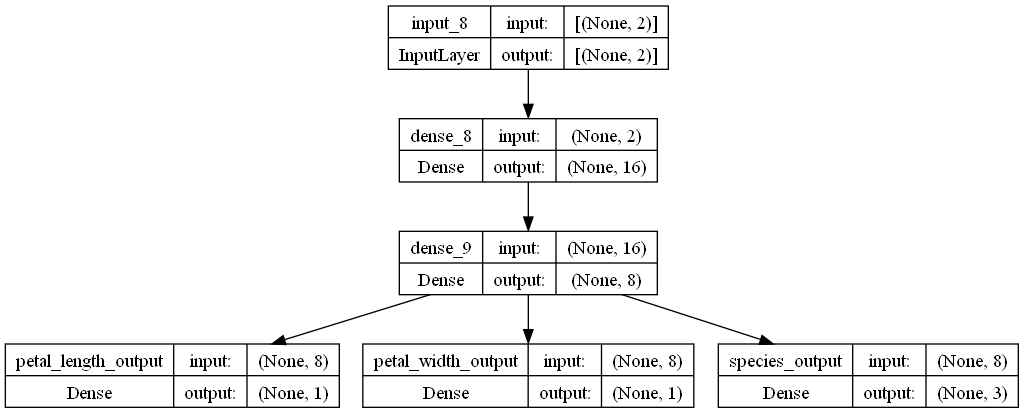

In [33]:
keras.utils.plot_model(model, show_shapes=True)

In [34]:
# compile
model.compile(optimizer='adam', 
              loss=["mse", "mse", "sparse_categorical_crossentropy"])
# loss 함수는 output 순서대로 리스트로 묶어서 제공
             # 출력 결과 순서별로 loss를 구해서 모두 더한 Total Loss 를 이용해 최적화작업을 수행한다.

In [35]:
tf.data.Dataset.from_tensor_slices((X, (y1, y2, y3)))

<_TensorSliceDataset element_spec=(TensorSpec(shape=(2,), dtype=tf.float64, name=None), (TensorSpec(shape=(), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None)))>

In [36]:
hist = model.fit(X, 
                [y1, y2, y3],  # y가 여러개이면 리스트로 묶어준다.
                epochs=100,
                validation_split=0.2 
                )

Epoch 1/100
4/4 [==============================] - 1s 67ms/step - loss: 14.7817 - petal_length_output_loss: 10.5495 - petal_width_output_loss: 3.1193 - species_output_loss: 1.1129 - val_loss: 31.7783 - val_petal_length_output_loss: 23.3258 - val_petal_width_output_loss: 7.3249 - val_species_output_loss: 1.1276
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 14.2421 - petal_length_output_loss: 9.9956 - petal_width_output_loss: 3.1480 - species_output_loss: 1.0985 - val_loss: 30.9263 - val_petal_length_output_loss: 22.4021 - val_petal_width_output_loss: 7.3082 - val_species_output_loss: 1.2161
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 13.7667 - petal_length_output_loss: 9.5348 - petal_width_output_loss: 3.1463 - species_output_loss: 1.0856 - val_loss: 30.1726 - val_petal_length_output_loss: 21.4681 - val_petal_width_output_loss: 7.4161 - val_species_output_loss: 1.2884
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - 

4/4 [==============================] - 0s 11ms/step - loss: 7.0764 - petal_length_output_loss: 2.0234 - petal_width_output_loss: 4.0204 - species_output_loss: 1.0326 - val_loss: 16.2623 - val_petal_length_output_loss: 5.0856 - val_petal_width_output_loss: 9.3872 - val_species_output_loss: 1.7895
Epoch 54/100
4/4 [==============================] - 0s 10ms/step - loss: 6.9918 - petal_length_output_loss: 1.9852 - petal_width_output_loss: 3.9744 - species_output_loss: 1.0322 - val_loss: 16.0769 - val_petal_length_output_loss: 4.9853 - val_petal_width_output_loss: 9.3040 - val_species_output_loss: 1.7876
Epoch 55/100
4/4 [==============================] - 0s 10ms/step - loss: 6.9072 - petal_length_output_loss: 1.9515 - petal_width_output_loss: 3.9240 - species_output_loss: 1.0317 - val_loss: 15.9080 - val_petal_length_output_loss: 4.9135 - val_petal_width_output_loss: 9.2078 - val_species_output_loss: 1.7868
Epoch 56/100
4/4 [==============================] - 0s 10ms/step - loss: 6.8271 - p

##### 결과 시각화

In [37]:
hist.history.keys()

dict_keys(['loss', 'petal_length_output_loss', 'petal_width_output_loss', 'species_output_loss', 'val_loss', 'val_petal_length_output_loss', 'val_petal_width_output_loss', 'val_species_output_loss'])

##### 새로운 데이터 추론

In [39]:
new_x = X[:3]
pred = model.predict(new_x)
pred  # 세 layer의 출력결과를 리스트로 묶어서 출력.
#[배열1, 배열2, 배열3] => 배열1 : y1의 추정결과, 배열2: y2의 추정결과, 배열3: y3의 추정결과

1/1 [==============================] - 0s 16ms/step


[array([[2.3148012],
        [2.4941373],
        [2.1637735]], dtype=float32),
 array([[-0.03192765],
        [-0.06605625],
        [-0.00318632]], dtype=float32),
 array([[0.3662475 , 0.40388337, 0.22986913],
        [0.35996354, 0.41508996, 0.22494645],
        [0.37147462, 0.39452156, 0.23400377]], dtype=float32)]

In [40]:
for pl, pw, s in zip(pred[0], pred[1], pred[2]):
    print(pl, pw, s, s.argmax(-1))

[2.3148012] [-0.03192765] [0.3662475  0.40388337 0.22986913] 1
[2.4941373] [-0.06605625] [0.35996354 0.41508996 0.22494645] 1
[2.1637735] [-0.00318632] [0.37147462 0.39452156 0.23400377] 1


In [41]:
y[:3]

array([0, 0, 0])

## 다중 입력 모델
- 가정 
    - IRIS 꽃 데이터 + 꽃의 사진을 입력해서 꽃의 종류를 예측한다.
- X: 꽃 데이터, 꽃 사진
- y: 꽃 종류

##### 데이터 로드

In [42]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [43]:
(X_train, _), (_, _) = keras.datasets.mnist.load_data()
X_img = X_train[:150]
X_train.shape, X_img.shape

((60000, 28, 28), (150, 28, 28))

##### 모델생성, 컴파일

In [44]:
# table 데이터와 영상데이터 두개를 입력으로 받는 모델.
# table 데이터는 Dense Layer를, 영상데이터는 Conv layer를 이용해 Feature Extraction을 처리.
# 추출된 두가지 특징을 합쳐서 품종을 추론하는 모델.

#### table(표) 데이터 - (4,)
iris_info_tensor = layers.Input(shape=(4, ))
x1 = layers.Dense(units=32, activation='relu')(iris_info_tensor)
x1 = layers.Dense(units=16, activation='relu')(x1)

#### 영상(image) 데이터 (28,28,1)
iris_img_tensor = layers.Input(shape=(28, 28, 1))
x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(iris_img_tensor)
x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x2)
x2 = layers.MaxPooling2D(padding='same')(x2)

x2 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x2)
x2 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x2)
x2 = layers.MaxPooling2D(padding='same')(x2)
x2 = layers.Flatten()(x2)

# x1 : 추출한 데이터로 부터 추출한 featrue map, x2 : 이미지로 부터 추출한 feature map
# x1과 x2를 합치기 -> 둘다 1차원 배열. ===> info의 특징과 image의 특징을 합친다.
x3 = layers.Concatenate()([x1, x2])  # layers.concatenate([x1, x2])

# outputlayer
output_tensor = layers.Dense(units=3, activation='softmax')(x3)

# 모델 생성
model2 = models.Model([iris_info_tensor, iris_img_tensor],  output_tensor)

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
X_img.shape

(150, 28, 28)

In [47]:
iris_img = X_img[..., np.newaxis] # channel 축 추가
iris_img.shape

NameError: name 'np' is not defined

In [48]:
hist= model2.fit([X, iris_img], # x : [표데이터, 이미지]
                  y, 
                  epochs=3, 
                  validation_split=0.2)

NameError: name 'iris_img' is not defined

In [ ]:
keras.utils.plot_model(model2, show_shapes=True)

## Subclass 방식
- 모델을 class로 구현
- \_\_init\_\_() 메소드에서 모델에 필요한 자원들(layer들)을 생성
- call() 메소드에서 모델 구조 정의

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [52]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_train.shape, X_test.shape

NameError: name 'np' is not defined

In [ ]:
class MnistModel(models.Model):
    
    def __init__(self):
        super().__init__()
        self.conv_block1 = keras.Sequential([
            layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
            layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
            layers.MaxPooling2D(padding='same')
        ])
        
        self.conv_block2 = keras.Sequential([
            layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
            layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
            layers.MaxPooling2D(padding='same')
        ])
        
        self.flatten = layers.Flatten()
        self.output_layer = layers.Dense(units=10, activation='softmax')        
        
        
    def call(self, x):  
        # input data를 받아서 forward propagation을 처리. 그 추론 결과를 반환
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.flatten(x)
        output_tensor = self.output_layer(x)
        return output_tensor
        

In [ ]:
# 모델생성
model = MnistModel()

# 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
# 학습
hist = model.fit(X_train, y_train, epochs=3, validation_split=0.25)